In [2]:
%pylab inline

from library import lasagnennet as LN
from library import features as F
from library import scale as S
from library import validate as V
import numpy as np
import theano as TH
import pandas as pa
import lasagne as L

Populating the interactive namespace from numpy and matplotlib


Using gpu device 0: Tesla K20m (CNMeM is disabled)


In [6]:
train_feats = pa.read_csv('full_train_feats.csv')
train_targets = pa.read_csv('full_train_targets.csv')
val_feats = pa.read_csv('validation_feats.csv')
val_targets = pa.read_csv('validation_targets.csv')
vval_feats = pa.read_csv('val_train_feats.csv')
vval_targets = pa.read_csv('val_train_targets.csv')

In [7]:
tx = np.asarray(train_feats, dtype=np.float32)
tyall = np.asarray(train_targets, dtype=np.float32)
ty = np.asarray(train_targets['LABEL'], dtype=np.float32).reshape(-1, 1)
vx = np.asarray(val_feats, dtype=np.float32)
vyall = np.asarray(val_targets, dtype=np.float32)
vy = np.asarray(val_targets['LABEL'], dtype=np.float32).reshape(-1, 1)

In [8]:
valx = np.asarray(vval_feats, dtype=np.float32)
valyall = np.asarray(vval_targets, dtype=np.int64)

In [9]:
ty = ty.ravel()
vy = vy.ravel()

In [10]:
print tx.shape, tyall.shape, ty.shape, vx.shape, vyall.shape, vy.shape

(628437, 129) (628437, 4) (628437,) (152282, 321) (152282, 4) (152282,)


In [11]:
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc_score

In [12]:
clf = svm.SVC(verbose=True, max_iter=200, class_weight={0:1, 1:1.5})
clf.fit(tx, ty)

[LibSVM]

/home/du2/12CS30009/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:204: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight={0: 1, 1: 1.5}, coef0=0.0, degree=3,
  gamma=0.0, kernel='rbf', max_iter=200, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=True)

In [13]:
tprobs = clf.decision_function(tx)
# vprobs = clf.decision_function(vx)
valprobs = clf.decision_function(valx)

0.678517218615


/home/du2/12CS30009/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function auc_score is deprecated; Function 'auc_score' has been renamed to 'roc_auc_score' and will be removed in release 0.16.
  warnings.warn(msg, category=DeprecationWarning)


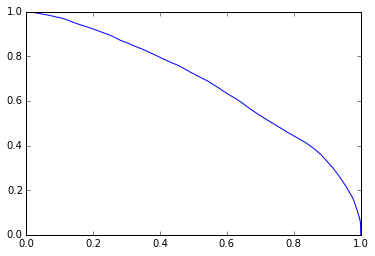

In [14]:
yscore = tprobs.ravel()
fpr, tpr, thresh = roc_curve(ty, yscore)
auc = auc_score(ty, yscore)
print auc
display(pyplot.plot(1-fpr, tpr,))

# yscore = vprobs.ravel()
# fpr, tpr, thresh = roc_curve(vy, yscore)
# auc = auc_score(vy, yscore)
# print auc
# display(pyplot.plot(1-fpr, tpr,))

In [19]:
thresh = np.percentile(vprobs.ravel(), 99.3)
pred = np.int32(vprobs.ravel() >= thresh)
print np.sum(pred)

outfile = open('out.csv', 'w')
outfile.write('ID,TIME,LABEL,ICU\n')
for i in xrange(vx.shape[0]):
    if np.int32(vyall[i,3]) == 1.0:
        outfile.write(str(vyall[i,0])+','+str(vyall[i,1])+','+str(pred[i])+',1\n')
outfile.close()

NameError: name 'vprobs' is not defined

In [18]:
thresh = np.percentile(valprobs.ravel(), 99.3)
pred = np.int32(valprobs.ravel() >= thresh)
print np.sum(pred)

outfile = open('output.csv', 'w')
# outfile.write('ID,TIME,LABEL\n')
for i in xrange(valx.shape[0]):
    if np.int64(valyall[i,2]) == 1:
        outfile.write(str(valyall[i,0])+','+str(valyall[i,1])+','+str(pred[i])+'\n')
outfile.close()

1400


In [163]:
reload(V)
V.validate('out.csv', './Training_Dataset/id_label_train.csv')

tp :  8 , tn :  841 , fp :  8 , fn :  49
sensitivity :  0.140350877193 , specificity :  0.990577149588
accuracy :  0.937086092715 median prediction time :  165.631111111
finalScore :  30.8148905833


(0.14035087719298245,
 0.9905771495877503,
 0.9370860927152318,
 165.63111111111112,
 30.81489058334886)